In [1]:
import numpy as np
import matplotlib.pyplot as plt

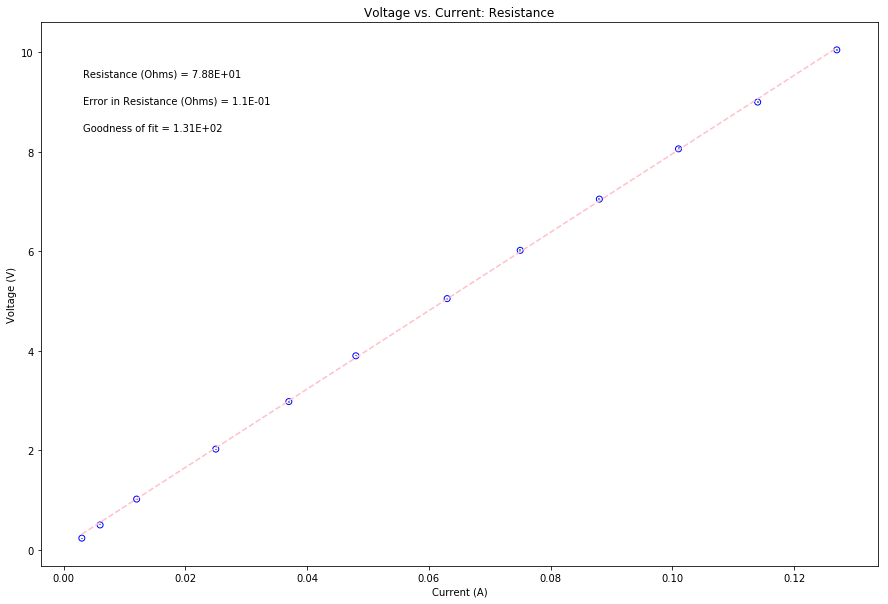

In [2]:
xvariable_I = np.array([0.003, 0.006, 0.012, 0.025, 0.037, 0.048, 0.063, 0.075, 0.088, 0.101, 0.114, 0.127])
yvariable_V = np.array([0.235, 0.500, 1.020, 2.025, 2.980, 3.900, 5.050, 6.020, 7.05, 8.06, 9.00, 10.05]) 

err_yvariable_V = np.array([0.010, 0.010, 0.010, 0.010, 0.020, 0.010, 0.020, 0.030, 0.020, 0.030, 0.020, 0.020])


x = xvariable_I
y = yvariable_V
dy = err_yvariable_V


b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

fit = b+m*x

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) 
db = np.sqrt(1/D*sum(x**2/dy**2)) 

def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)


plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='pink', linestyle='--')
plt.scatter(x, y, color='blue', marker='o', facecolor='none')

plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.title('Voltage vs. Current: Resistance')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")
 
plt.annotate('Resistance (Ohms) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Resistance (Ohms) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
